In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline 

titanic=pd.read_csv('C:/Users/aadar/Documents/anaconda_data/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


<Figure size 432x288 with 0 Axes>

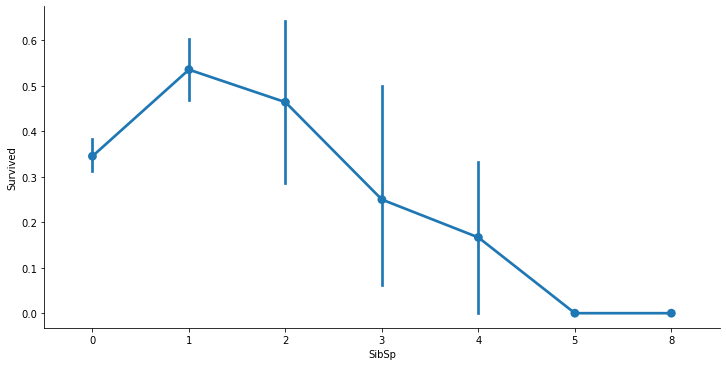

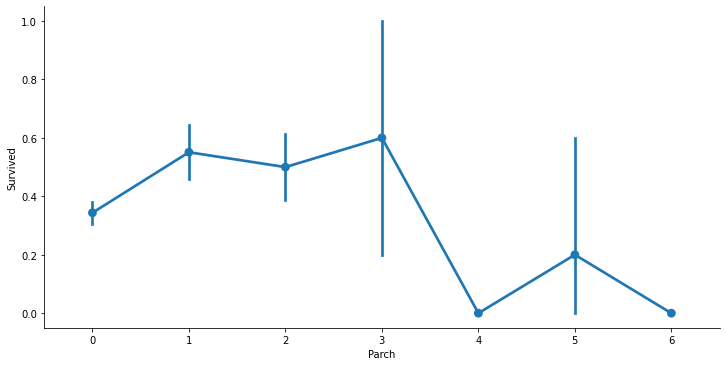

In [15]:
for i, col in enumerate(['SibSp','Parch']):
    plt.figure(i)
    sns.catplot(x=col,y='Survived',data=titanic,kind='point',aspect=2,)

In [16]:
titanic['Family_cnt']=titanic['SibSp']+titanic['Parch']


In [17]:
titanic.drop(['PassengerId','SibSp','Parch'],axis=1,inplace=True)

In [18]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


In [19]:
titanic.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age             0
Ticket          0
Fare            0
Cabin         687
Embarked        2
Family_cnt      0
dtype: int64

In [20]:
titanic.groupby(titanic['Cabin'].isnull())['Survived'].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [22]:
titanic['Cabin_ind']=np.where(titanic['Cabin'].isnull(),0,1)
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt,Cabin_ind
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0,0


In [23]:
gender_num={'male':0,'female':1}
titanic['Sex']=titanic['Sex'].map(gender_num)
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt,Cabin_ind
0,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S,0,0


In [24]:
titanic.drop(['Cabin','Embarked','Name','Ticket'],axis=1,inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


In [26]:
titanic.to_csv('C:/Users/aadar/Documents/anaconda_data/titanic_cleaned.csv',index=False)

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
titanic=pd.read_csv('C:/Users/aadar/Documents/anaconda_data/titanic_cleaned.csv')
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


In [36]:
features=titanic.drop('Survived',axis=1)
labels=titanic['Survived']
X_train, X_test, y_train,y_test=train_test_split(features,labels,test_size=0.4,random_state=42)
X_val, X_test, y_val,y_test=train_test_split(X_test,y_test,test_size=0.5,random_state=42)

In [37]:
for dataset in [y_train,y_val,y_test]:
    print(round(len(dataset)/len(labels),2))

0.6
0.2
0.2


In [38]:
X_train.to_csv('C:/Users/aadar/Documents/anaconda_data/train_features.csv',index=False)
X_val.to_csv('C:/Users/aadar/Documents/anaconda_data/val_features.csv',index=False)
X_test.to_csv('C:/Users/aadar/Documents/anaconda_data/test_features.csv',index=False)

y_train.to_csv('C:/Users/aadar/Documents/anaconda_data/train_labels.csv',index=False)
y_val.to_csv('C:/Users/aadar/Documents/anaconda_data/val_labels.csv',index=False)
y_test.to_csv('C:/Users/aadar/Documents/anaconda_data/test_labels.csv',index=False)

In [39]:
from sklearn.linear_model import LogisticRegression
LogisticRegression()

LogisticRegression()

In [40]:
dir(LogisticRegression)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_predict_proba_lr',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'decision_function',
 'densify',
 'fit',
 'get_params',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'score',
 'set_params',
 'sparsify']

In [79]:


import joblib
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

tr_features = pd.read_csv('C:/Users/aadar/Documents/anaconda_data/train_features.csv')
tr_labels = pd.read_csv('C:/Users/aadar/Documents/anaconda_data/train_labels.csv', header=None)



In [80]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [96]:
lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

BEST PARAMS: {'C': 1}

0.67 (+/-0.077) for {'C': 0.001}
0.708 (+/-0.098) for {'C': 0.01}
0.777 (+/-0.134) for {'C': 0.1}
0.8 (+/-0.118) for {'C': 1}
0.794 (+/-0.116) for {'C': 10}
0.794 (+/-0.116) for {'C': 100}
0.794 (+/-0.116) for {'C': 1000}


In [97]:
joblib.dump(cv.best_estimator_,'C:/Users/aadar/Documents/anaconda_data/LR_model.pkl')

['C:/Users/aadar/Documents/anaconda_data/LR_model.pkl']

In [ ]:
from sklearn.svm import SVC
SVC()

In [91]:
dir(SVC)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_check_proba',
 '_compute_kernel',
 '_decision_function',
 '_dense_decision_function',
 '_dense_fit',
 '_dense_predict',
 '_dense_predict_proba',
 '_estimator_type',
 '_get_coef',
 '_get_param_names',
 '_get_tags',
 '_impl',
 '_more_tags',
 '_pairwise',
 '_predict_log_proba',
 '_predict_proba',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sparse_decision_function',
 '_sparse_fit',
 '_sparse_kernels',
 '_sparse_predict',
 '_sparse_predict_proba',
 '_validate_data',
 '_validate_for_predict',
 '_validate_targets',


In [92]:

import joblib
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

tr_features = pd.read_csv('C:/Users/aadar/Documents/anaconda_data/train_features.csv')
tr_labels = pd.read_csv('C:/Users/aadar/Documents/anaconda_data/train_labels.csv', header=None)



In [93]:
svc=SVC()
parameters={
    'kernel':['linear','rbf'],
    'C':[0.1,1,10]
}
cv=GridSearchCV(svc, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())
print_results(cv)

BEST PARAMS: {'C': 0.1, 'kernel': 'linear'}

0.796 (+/-0.115) for {'C': 0.1, 'kernel': 'linear'}
0.654 (+/-0.06) for {'C': 0.1, 'kernel': 'rbf'}
0.796 (+/-0.115) for {'C': 1, 'kernel': 'linear'}
0.661 (+/-0.048) for {'C': 1, 'kernel': 'rbf'}
0.796 (+/-0.115) for {'C': 10, 'kernel': 'linear'}
0.684 (+/-0.07) for {'C': 10, 'kernel': 'rbf'}


In [94]:
cv.best_estimator_

SVC(C=0.1, kernel='linear')

In [95]:
joblib.dump(cv.best_estimator_,'C:/Users/aadar/Documents/anaconda_data/SVM_model.pkl')

['C:/Users/aadar/Documents/anaconda_data/SVM_model.pkl']

In [98]:
from sklearn.neural_network import  MLPRegressor, MLPClassifier

print(MLPRegressor())
print(MLPClassifier())

MLPRegressor()
MLPClassifier()


In [105]:
import joblib
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)




tr_features = pd.read_csv('C:/Users/aadar/Documents/anaconda_data/train_features.csv')
tr_labels = pd.read_csv('C:/Users/aadar/Documents/anaconda_data/train_labels.csv', header=None)


In [103]:
mlp=MLPClassifier()
parameters={
    'hidden_layer_sizes':[(10,),(50,),(100,)],
    'activation':['relu','tanh','logistic'],
    'learning_rate':['constant','invscaling','adaptive']
}

cv=GridSearchCV(mlp,parameters,cv=5)
cv.fit(tr_features, tr_labels.values.ravel())
print_results(cv)

E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer

E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer

E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer

E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer

BEST PARAMS: {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}

0.764 (+/-0.124) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.706 (+/-0.099) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.772 (+/-0.105) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.787 (+/-0.121) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.785 (+/-0.147) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.787 (+/-0.099) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
0.8 (+/-0.115) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.787 (+/-0.074) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.794 (+/-0.096) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learn

E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [106]:
cv.best_estimator_

MLPClassifier(activation='tanh', learning_rate='invscaling')

In [107]:
joblib.dump(cv.best_estimator_,'C:/Users/aadar/Documents/anaconda_data/MLP_model.pkl')

['C:/Users/aadar/Documents/anaconda_data/MLP_model.pkl']

In [112]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

print(RandomForestClassifier())
print(RandomForestRegressor())


RandomForestClassifier()
RandomForestRegressor()


In [113]:
import joblib
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)


tr_features = pd.read_csv('C:/Users/aadar/Documents/anaconda_data/train_features.csv')
tr_labels = pd.read_csv('C:/Users/aadar/Documents/anaconda_data/train_labels.csv', header=None)

In [115]:
rf=RandomForestClassifier()
parameters={
    'n_estimators':[5, 50, 250],
    'max_depth':[2, 4 , 8, 16, 32, None]
}
cv=GridSearchCV(rf,parameters,cv=5)
cv.fit(tr_features, tr_labels.values.ravel())
print_results(cv)


BEST PARAMS: {'max_depth': 4, 'n_estimators': 50}

0.796 (+/-0.102) for {'max_depth': 2, 'n_estimators': 5}
0.813 (+/-0.085) for {'max_depth': 2, 'n_estimators': 50}
0.807 (+/-0.103) for {'max_depth': 2, 'n_estimators': 250}
0.807 (+/-0.143) for {'max_depth': 4, 'n_estimators': 5}
0.826 (+/-0.121) for {'max_depth': 4, 'n_estimators': 50}
0.824 (+/-0.109) for {'max_depth': 4, 'n_estimators': 250}
0.805 (+/-0.088) for {'max_depth': 8, 'n_estimators': 5}
0.824 (+/-0.066) for {'max_depth': 8, 'n_estimators': 50}
0.82 (+/-0.071) for {'max_depth': 8, 'n_estimators': 250}
0.818 (+/-0.053) for {'max_depth': 16, 'n_estimators': 5}
0.815 (+/-0.024) for {'max_depth': 16, 'n_estimators': 50}
0.811 (+/-0.035) for {'max_depth': 16, 'n_estimators': 250}
0.798 (+/-0.063) for {'max_depth': 32, 'n_estimators': 5}
0.801 (+/-0.03) for {'max_depth': 32, 'n_estimators': 50}
0.811 (+/-0.033) for {'max_depth': 32, 'n_estimators': 250}
0.796 (+/-0.053) for {'max_depth': None, 'n_estimators': 5}
0.82 (+/-0.029)

In [116]:
joblib.dump(cv.best_estimator_,'C:/Users/aadar/Documents/anaconda_data/RF_model.pkl')

['C:/Users/aadar/Documents/anaconda_data/RF_model.pkl']

In [121]:
import joblib
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)


tr_features = pd.read_csv('C:/Users/aadar/Documents/anaconda_data/train_features.csv')
tr_labels = pd.read_csv('C:/Users/aadar/Documents/anaconda_data/train_labels.csv', header=None) 

In [122]:

gb=GradientBoostingClassifier()
parameters={
    'n_estimators':[5, 50, 250, 500],
    'max_depth':[1, 3, 5, 7, 9],
    'learning_rate':[0.01, 0.1, 1, 10, 100]
}
cv=GridSearchCV(gb,parameters,cv=5)
cv.fit(tr_features, tr_labels.values.ravel())
print_results(cv)



BEST PARAMS: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

0.624 (+/-0.007) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.796 (+/-0.115) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.796 (+/-0.115) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.811 (+/-0.117) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.624 (+/-0.007) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.811 (+/-0.069) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.83 (+/-0.074) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.839 (+/-0.084) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.624 (+/-0.007) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.82 (+/-0.051) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.82 (+/-0.037) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.828 (+/-0.047) for {'learning_rat

In [123]:
joblib.dump(cv.best_estimator_,'C:/Users/aadar/Documents/anaconda_data/GB_model.pkl')

['C:/Users/aadar/Documents/anaconda_data/GB_model.pkl']

In [145]:
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

val_features=pd.read_csv('C:/Users/aadar/Documents/anaconda_data/val_features.csv')
val_labels=pd.read_csv('C:/Users/aadar/Documents/anaconda_data/val_labels.csv', header=None)

te_features=pd.read_csv('C:/Users/aadar/Documents/anaconda_data/test_features.csv')
te_labels=pd.read_csv('C:/Users/aadar/Documents/anaconda_data/test_labels.csv',header=None)


In [147]:
models ={}
for mdl in ['LR','SVM','MLP','RF','GB']:
    models[mdl]=joblib.load('C:/Users/aadar/Documents/anaconda_data/{}_model.pkl'.format(mdl))


In [141]:
models


{'LR': LogisticRegression(C=1),
 'SVM': SVC(C=0.1, kernel='linear'),
 'MLP': MLPClassifier(activation='tanh', learning_rate='invscaling'),
 'RF': RandomForestClassifier(max_depth=4, n_estimators=50),
 'GB': GradientBoostingClassifier(learning_rate=0.01, n_estimators=500)}

In [148]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name, accuracy, precision, recall, round(end-start)))

In [149]:
for name, mdl in models.items():
    evaluate_model(name, mdl, val_features, val_labels)

LR -- Accuracy: 0.775 / Precision: 0.712 / Recall: 0.646 / Latency: 0ms
SVM -- Accuracy: 0.747 / Precision: 0.672 / Recall: 0.6 / Latency: 0ms
MLP -- Accuracy: 0.775 / Precision: 0.705 / Recall: 0.662 / Latency: 0ms
RF -- Accuracy: 0.798 / Precision: 0.809 / Recall: 0.585 / Latency: 0ms
GB -- Accuracy: 0.815 / Precision: 0.808 / Recall: 0.646 / Latency: 0ms


In [150]:
evaluate_model('Random Forest', models['RF'], te_features, te_labels)

Random Forest -- Accuracy: 0.793 / Precision: 0.855 / Recall: 0.618 / Latency: 0ms
